--------------------------------------------------------------------------------------------------------------------------------
# Titanic Survival Prediction

- The objective of this problem is to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using the passenger data (i.e., name, age, gender, socio-economic class, etc.).
--------------------------------------------------------------------------------------------------------------------------------

In [1]:
# Import necessary libraries
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

plt.style.use('ggplot')

import seaborn as sns

from sklearn import tree

# To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset

train = pd.read_csv('Downloads/titanic/train.csv')
test  = pd.read_csv('Downloads/titanic/test.csv')

In [3]:
# Viewing first 5 rows of dataset

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Check data types of the columns in dataset

train.info()
print('\n')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass

**Observations:**

- There are 891 rows and 12 columns in the training data.
- The columns Age, Cabin, and Embarked have missing values.
- There are some columns like 'PassengerId', 'Name', 'Ticket', 'Cabin', and 'Fare' which would not add value to the model. We will drop these columns.

In [6]:
# No of unique categories in column

train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
# Checking Statistical summary of data

train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


**Observations:**

- Age range of a minimum of 0.42 years to maximum of 80 years which indicates their was babies and old people on board.
- Variables 'SibSp' and 'Parch' can be added together to make up a family, reducing the number of features and complexity of the model.


In [8]:
# missing values by columns.
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Rate of missing values by columns.
train.isna().sum() / train.shape[0] * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [10]:
# Find average ages per category in Pclass

avg_age_train_class1 = train[train['Pclass'] == 1]['Age'].mean()
avg_age_train_class2 = train[train['Pclass'] == 2]['Age'].mean()
avg_age_train_class3 = train[train['Pclass'] == 3]['Age'].mean()
print(avg_age_train_class1, avg_age_train_class2, avg_age_train_class3)

38.233440860215055 29.87763005780347 25.14061971830986


### **Univariate Analysis**

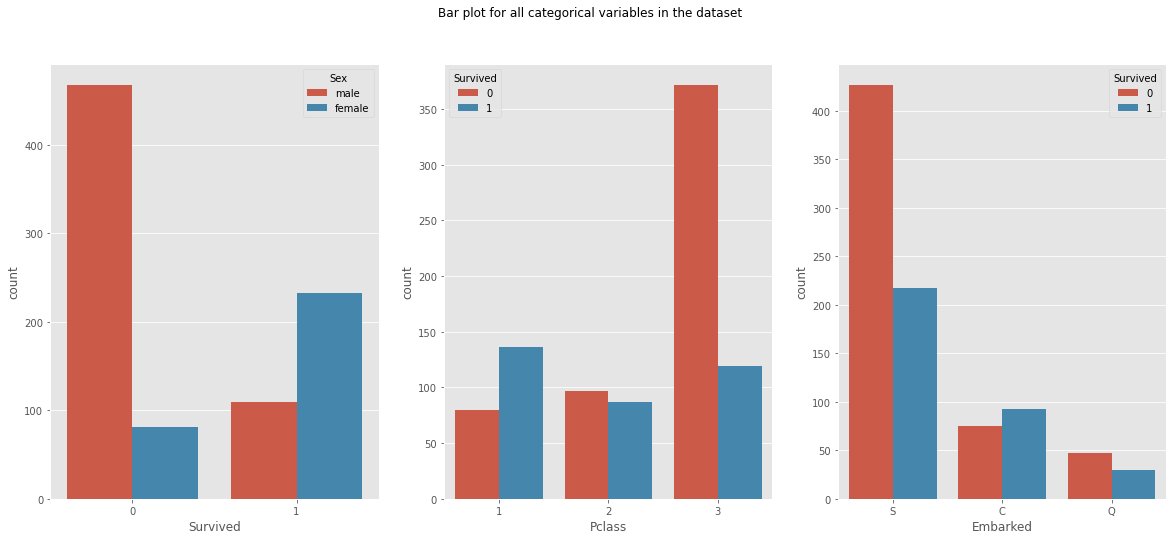

In [11]:
# Bar plot for all categorical variables in the dataset

fig, axes = plt.subplots(1, 3, figsize = (20, 8))
  
fig.suptitle('Bar plot for all categorical variables in the dataset')

sns.countplot(ax = axes[0], x = 'Survived', data = train, hue = "Sex", 
              order = train['Survived'].value_counts().index);

sns.countplot(ax = axes[1], x = 'Pclass', hue = "Survived", data = train);

sns.countplot(ax = axes[2], x = 'Embarked', hue = "Survived", data = train);

- The above plot shows that number people that survived are significantly less than number of people that did'nt.
- Significantly more females survived than males

In [12]:
#To get a better understanding on the correlations (between the numerical attibutes), let's call the correlation matrix:
corr_matx=train.corr()
corr_matx['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

**Observation:**
- There's a weak positive correlation between the 'Parch' and the target variable 'Survived'.
- There's a weak negative correlation between 'Pclass', 'Age', 'Sibsp' and target variable 'Survived'. 
- Only Pclass and Fare show significant correlation with target variable 'Survived'

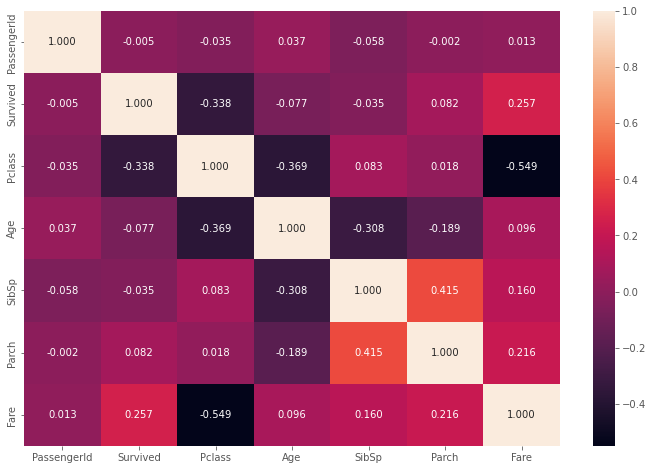

In [13]:
# Finding the correlation between various columns of the dataset

plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), annot=True, fmt=".3f");


**Observation:**

- There's a weak positive correlation between the 'Parch' and the target variable 'Survived'.
- There's a weak negative correlation between 'Pclass', 'Age', 'Sibsp' and target variable 'Survived'.
- Only Pclass and Fare show significant correlation with target variable 'Survived'


**Missing Value Treatment**

In [14]:
# Filling missing values in the Age column using the median of the Age column
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

In [15]:
# Filling missing values in the Embarked column using the mode of the column, i.e., 'S'
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
train['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [17]:
# Filling missing values in the Embarked column using the mode of the column, i.e., 'S'

train['Embarked'] = train['Embarked'].fillna('S')

In [18]:
train['Survived'].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

**Feature Engineering** 

In [19]:
# Creating a new column familysize

train['FamilySize'] = train['Parch'] + train['SibSp']

test_features = test.copy()
test_features['FamilySize'] = test_features['Parch'] + test_features['SibSp']

In [20]:
# Dropping un-necessary columns
train.drop(['PassengerId', 'Name','Parch', 'SibSp', 'Ticket', 'Cabin', 'Fare'], axis = 1, inplace = True)
test_features.drop(['PassengerId', 'Name', 'Parch', 'SibSp', 'Ticket', 'Cabin', 'Fare'], axis = 1, inplace = True)

In [21]:
# Replacing the initials in the Embarked column with the full name
train.loc[train['Embarked'] == 'C' , 'Embarked'] = 'Cherbourg'
train.loc[train['Embarked'] == 'S' , 'Embarked'] = 'Southampton'
train.loc[train['Embarked'] == 'Q' , 'Embarked'] = 'Queenstown'

test_features.loc[train['Embarked'] == 'C' , 'Embarked'] = 'Cherbourg'
test_features.loc[train['Embarked'] == 'S' , 'Embarked'] = 'Southampton'
test_features.loc[train['Embarked'] == 'Q' , 'Embarked'] = 'Queenstown'

In [22]:
# Binning the Age column
bins = [0, 13, 25, 40, 65, np.inf]

names = ['<13', '13-25', '25-40', '40-65', '65+']

train['Age'] = pd.cut(train['Age'], bins, labels = names)
test_features['Age'] = pd.cut(test_features['Age'], bins, labels = names)

# Printing 10 observations
train.sample(5)

,Survived,Pclass,Sex,Age,Embarked,FamilySize
840,0,3,male,13-25,Southampton,0
24,0,3,female,<13,Southampton,4
274,1,3,female,25-40,Queenstown,0
145,0,2,male,13-25,Southampton,2
653,1,3,female,25-40,Queenstown,0


In [23]:
train.info()
print('\n')
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Sex         891 non-null    object  
 3   Age         891 non-null    category
 4   Embarked    891 non-null    object  
 5   FamilySize  891 non-null    int64   
dtypes: category(1), int64(3), object(2)
memory usage: 36.0+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Pclass      418 non-null    int64   
 1   Sex         418 non-null    object  
 2   Age         418 non-null    category
 3   Embarked    418 non-null    object  
 4   FamilySize  418 non-null    int64   
dtypes: category(1), int64(2), object(2)
memory usage: 13.8+ KB


**Observation:**

- There are no more null values in our dataset

In [24]:
# Encoding the categorical columns
train.Sex = pd.factorize(train.Sex)[0]
train.Age = pd.factorize(train.Age)[0]
train.Embarked = pd.factorize(train.Embarked)[0]

test_features.Sex = pd.factorize(test.Sex)[0]
test_features.Age = pd.factorize(test.Age)[0]
test_features.Embarked = pd.factorize(test.Embarked)[0]

train.sample(10)

,Survived,Pclass,Sex,Age,Embarked,FamilySize
290,1,1,1,1,0,0
30,0,1,0,1,1,0
890,0,3,0,1,2,0
565,0,3,0,0,0,2
769,0,3,0,1,0,0
722,0,2,0,1,0,0
792,0,3,1,1,0,10
210,0,3,0,0,0,0
300,1,3,1,1,2,0
301,1,3,0,1,2,2


In [25]:
# Splitting the dataset

pcnt = .8

# Random state is a seed value
trainT = train.sample(frac = pcnt, random_state = 14)

trainV = train.drop(trainT.index)

#Create training and validation datasets
X_trainT = trainT[['Pclass', 'Sex', 'Age', 'Embarked', 'FamilySize']]
Y_trainT = trainT['Survived']
X_trainV = trainV[['Pclass', 'Sex', 'Age', 'Embarked', 'FamilySize']]
Y_trainV = trainV['Survived']

In [26]:
X_trainT.shape, X_trainV.shape

((713, 5), (178, 5))

### Modelling
**Decision Tree Model**

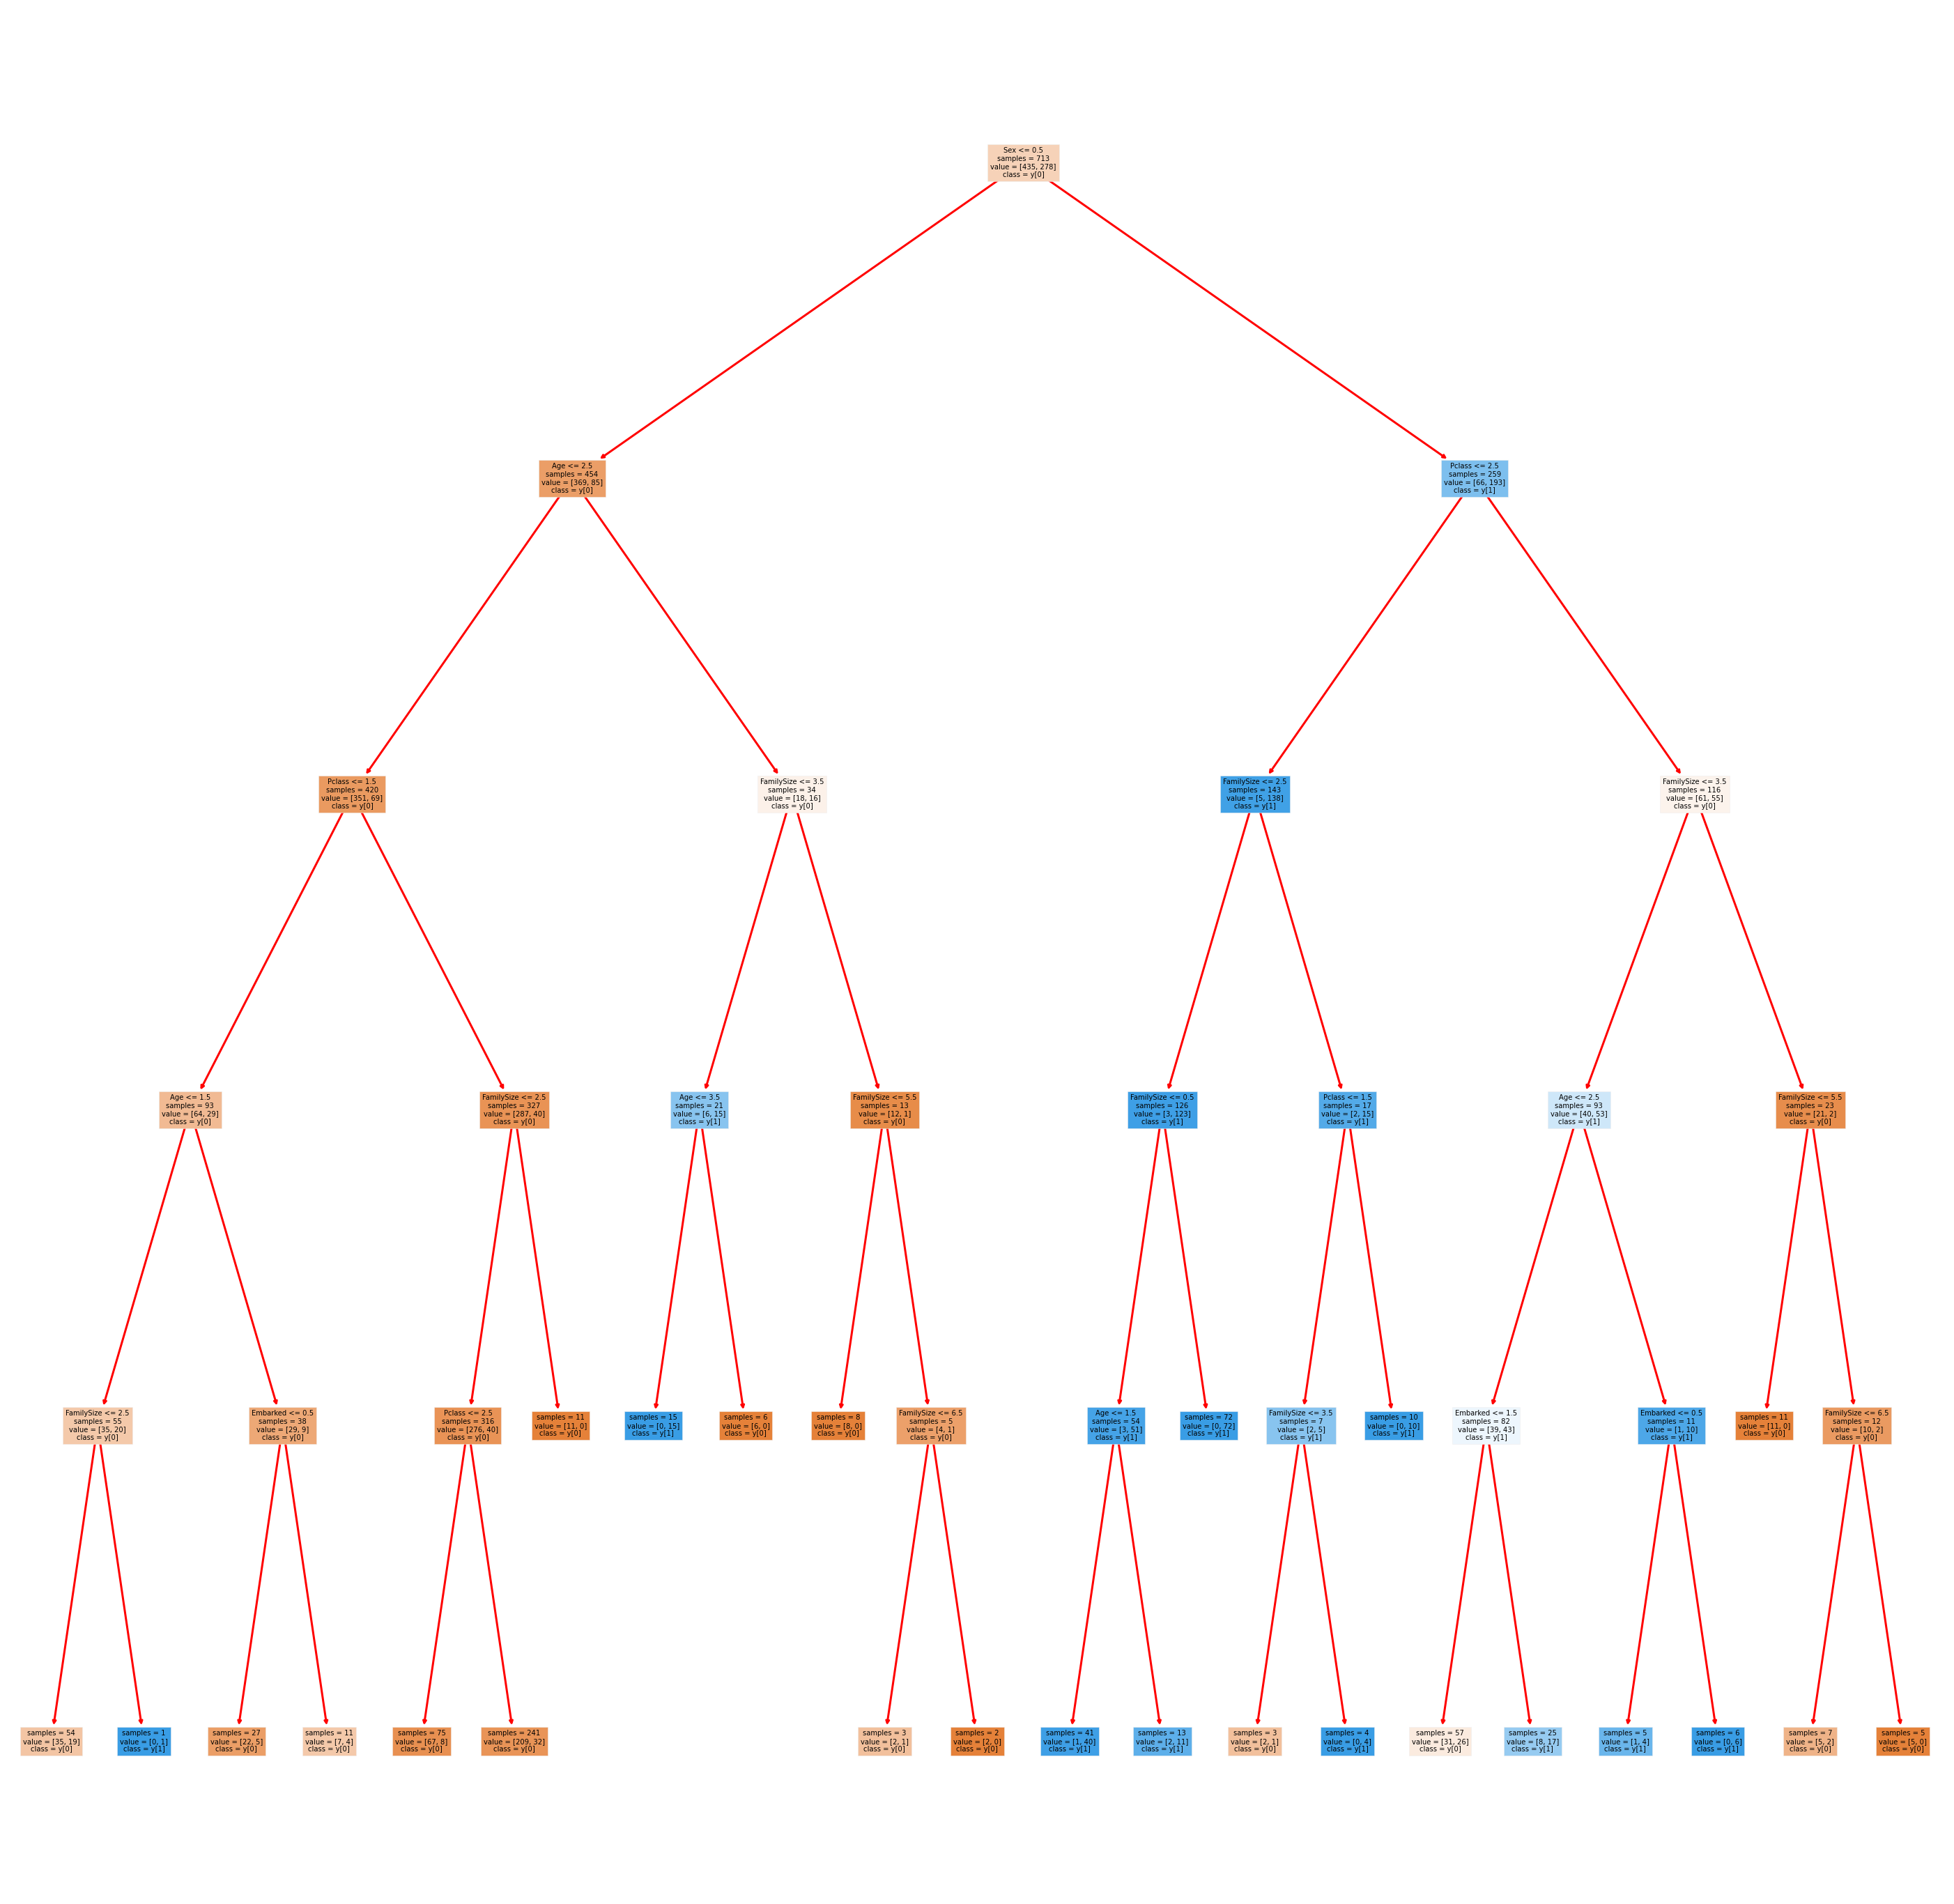

In [27]:
# Creating a decision tree model
DT_clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)

# Fitting the model on the train data
DT_clf = DT_clf.fit(X_trainT, Y_trainT)

fig, ax = plt.subplots(figsize = (50, 50))

output = tree.plot_tree(DT_clf, fontsize = 10, max_depth = 5, impurity = False, filled = True, feature_names = ['Pclass', 'Sex', 'Age', 'Embarked', 'FamilySize'], class_names = True)

for o in output:
    
    arrow = o.arrow_patch
    
    if arrow is not None:
        
        arrow.set_edgecolor('red')
        
        arrow.set_linewidth(3)

# Display the plot       
plt.show()

**Observations:**

- We can see that the first split is based on the sex of the passenger. It is one of the most important factors while figuring out who survived, as we can see that in the leaves, more females survived in comparison to males. This might be because females were extracted first.
- We can see that among females, more from the first class and second class passengers survived in comparison to passengers who were traveling in the 3rd class.
- For males, age is an important factor. There is only one passenger younger than 25 years of age who survived.

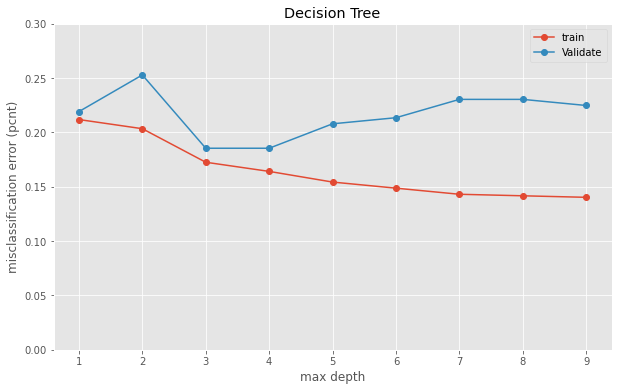

In [28]:
# Visualizing and comparing the error on the train data and the test data for different values of max_depth in the decision tree classifier.

train_scores = []

Validate_scores = []

for depth in range(1, 10):
    
    DT_clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = depth)
    
    DT_clf = DT_clf.fit(X_trainT, Y_trainT)
    
    train_scores.append(1 - DT_clf.score(X_trainT, Y_trainT))
    
    Validate_scores.append(1 - DT_clf.score(X_trainV, Y_trainV))

plt.plot(range(1, 10), train_scores, '-o', label = "train")

plt.plot(range(1, 10), Validate_scores, '-o', label = "Validate")

plt.legend(loc = 'best')

plt.xlabel('max depth')

plt.ylabel('misclassification error (pcnt)')

# Setting the range of the Y-axis
plt.ylim(0, 0.3)

plt.title(f"Decision Tree")

fig = plt.gcf()

fig.set_size_inches(10, 6)

plt.show()

**Observations:**

- We can see that the training error keeps decreasing as the maximum depth increases but the test error eventually starts increasing after the initial decrease.
- The train and the test error are close for max_depth = 1 but that is again not a good model as the decision tree is making predictions based on a single node. We can say that the model has a high bias.
- The max_depth = 3 seems like the "sweet spot" where training and testing errors are balanced.

In [29]:
# Creating metric function

from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score
from sklearn.metrics import recall_score, roc_curve, classification_report, confusion_matrix,precision_score,accuracy_score;

def metrics_score(actual, predicted):
    
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Died', 'Survived'], yticklabels = ['Died', 'Survived'])
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

In [30]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    
    predictors: independent variables
    
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall
    
    precision = precision_score(target, pred, average = 'macro')              # To compute precision
               
    acc = accuracy_score(target, pred)                                 # To compute accuracy score
    

    # Creating a dataframe of metrics
    
    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },
        
        index = [0],
    )

    return df_perf

              precision    recall  f1-score   support

           0       0.78      0.89      0.84       114
           1       0.75      0.56      0.64        64

    accuracy                           0.78       178
   macro avg       0.77      0.73      0.74       178
weighted avg       0.77      0.78      0.77       178



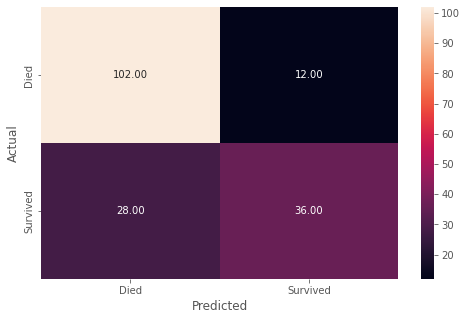

In [31]:
# Checking performance on the validation dataset
Y_trainV_pred = DT_clf.predict(X_trainV)

metrics_score(Y_trainV, Y_trainV_pred)

In [32]:
dtree_test = model_performance_classification(DT_clf,X_trainV,Y_trainV)
dtree_test

,Precision,Recall,Accuracy
0,0.767308,0.728618,0.775281


**Observation:**

- Decicsion Tree model shows less than average performance with an **accuracy** of 0.78, **recall** of 0.56 and **f1-score** of 0.64 on training data.
- The Decision Tree model is performing less than average in terms of accuracy of 78%. The recall for class 1 of 56% is very low compared to class 0 of 89%, which implies that this model has a high number of false negative, the model will perform poorly in predicting those whose survived. 
- A recall of ~0.56 suggests that there is a 44% chance that the model will predict that a passenger will die even though they survived.
- The average recall and precision for the model poor, we will try using other algorithms to get better performance.

<AxesSubplot:xlabel='Importance'>

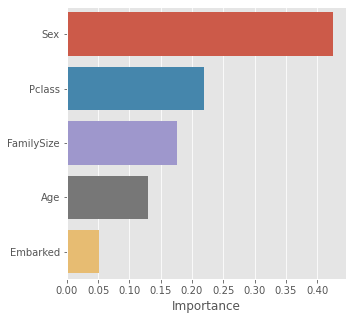

In [33]:
# Plot the feature importance

X_train = train[['Pclass', 'Sex', 'Age', 'Embarked', 'FamilySize']]
importances = DT_clf.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (5, 5))

sns.barplot(importance_df.Importance,importance_df.index)

- **'Sex' is significantly the most important feature followed by 'Pclass', 'FamilySize', 'Age' and 'Embarked'.**

**Decision Tree - Hyperparameter Tuning**

In [34]:
# Using GridSearch for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV;
from sklearn import metrics, model_selection;

# Choose the type of classifier
dtree_estimator = tree.DecisionTreeClassifier(class_weight = {0: 0.39, 1: 0.61}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_trainT, Y_trainT)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(X_trainT, Y_trainT)

DecisionTreeClassifier(class_weight={0: 0.39, 1: 0.61}, max_depth=4,
                       min_samples_leaf=20, random_state=1)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       435
           1       0.77      0.74      0.76       278

    accuracy                           0.81       713
   macro avg       0.80      0.80      0.80       713
weighted avg       0.81      0.81      0.81       713



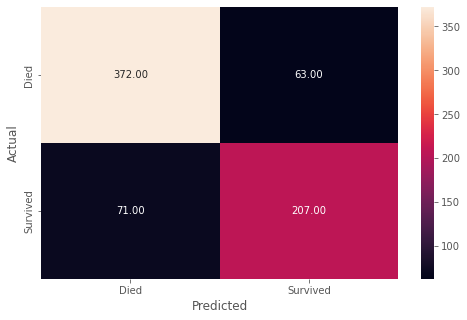

In [35]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(X_trainT)

metrics_score(Y_trainT, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       114
           1       0.73      0.70      0.71        64

    accuracy                           0.80       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178



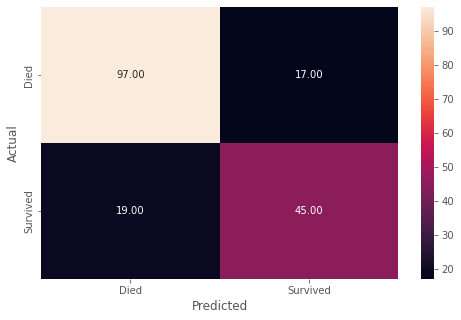

In [36]:
# Checking performance on the training dataset
y_test_pred_dt = dtree_estimator.predict(X_trainV)

metrics_score(Y_trainV, y_test_pred_dt)

In [37]:
# Model Performance for Tuned Decision Tree model on validation data.

dtree_tuned_test = model_performance_classification(dtree_estimator,X_trainV,Y_trainV)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.781007,0.777001,0.797753


**Observation:**

- The Decision tree model after the hyperparameter tuning shows some improvement in performance, model score for **recall, f1-score** and **accuracy** has improve significantly.
- The Tuned Model shows only slight better performance on the training data over test data, suggest only slight overfitting and model generalizing well.

**Random Forest Classifier**

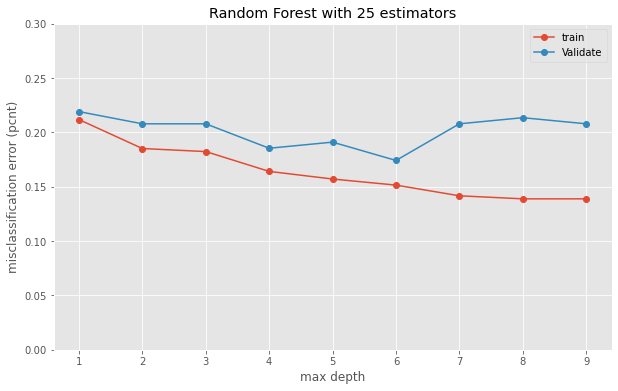

In [38]:
from sklearn.ensemble import RandomForestClassifier

train_scores = []

Validate_scores = []

for depth in range(1, 10):
    
    RF_clf = RandomForestClassifier(random_state = 0, criterion = 'entropy', max_depth = depth, n_estimators = 25)
    
    RF_clf = RF_clf.fit(X_trainT, Y_trainT)
    
    train_scores.append(1 - RF_clf.score(X_trainT, Y_trainT))
    
    Validate_scores.append(1 - RF_clf.score(X_trainV, Y_trainV))

plt.plot(range(1, 10), train_scores, '-o', label = "train")

plt.plot(range(1, 10), Validate_scores, '-o', label = "Validate")

plt.legend(loc = 'upper right')

plt.xlabel('max depth')

plt.ylim(0, 0.3)

plt.ylabel('misclassification error (pcnt)')

plt.title(f"Random Forest with 25 estimators")

fig = plt.gcf()

fig.set_size_inches(10, 6)

plt.show()

**Observations:**

- Random forest has helped reduce the extent of the overfitting problem in decision trees.
- We can see that the random forest is giving generalized results at max_depth = 6 which was overfitting for a single decision tree.

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       114
           1       0.75      0.62      0.68        64

    accuracy                           0.79       178
   macro avg       0.78      0.76      0.76       178
weighted avg       0.79      0.79      0.79       178



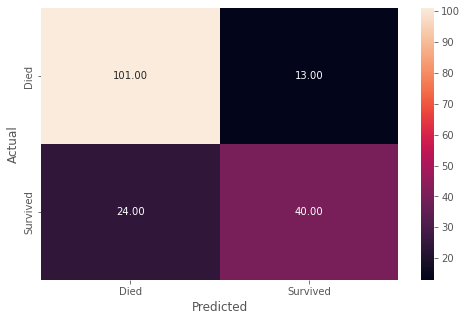

In [39]:
# Checking performance on the validation dataset

Y_trainV_pred1 = RF_clf.predict(X_trainV)
metrics_score(Y_trainV, Y_trainV_pred1)

In [40]:
rf_estimator_test = model_performance_classification(RF_clf,X_trainV,Y_trainV)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.781358,0.755482,0.792135


**Observation:**

- Random Forest model under-performing with **f1-score** of 0.68, **recall** of 0.62 and **accuracy** of 0.79. 

<AxesSubplot:xlabel='Importance'>

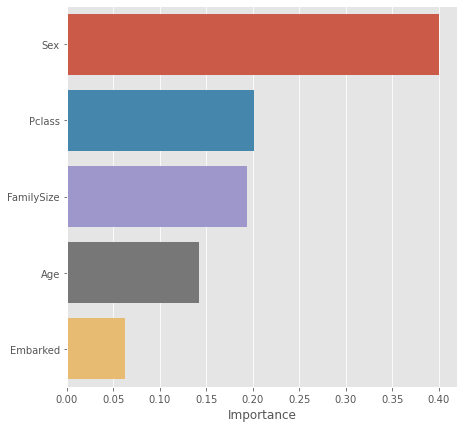

In [41]:
# Plot the feature importance
#X_train = train[['Pclass', 'Sex', 'Age', 'Embarked', 'FamilySize']]

importances = RF_clf.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (7, 7))

sns.barplot(importance_df.Importance,importance_df.index)

- **Similar to the Decision Tree model , the most important features for the Random Forest are 'Sex', "Pclass", 'FamilySize'.**

**Random Forest - Hyperparameter Tuning**

In [42]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.39, 1: 0.61}, random_state = 1)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
        'max_depth': np.arange(2, 7),
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_trainT, Y_trainT)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [43]:
rf_estimator_tuned.fit(X_trainT, Y_trainT)

RandomForestClassifier(class_weight={0: 0.39, 1: 0.61}, max_depth=4,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       435
           1       0.81      0.75      0.78       278

    accuracy                           0.84       713
   macro avg       0.83      0.82      0.82       713
weighted avg       0.83      0.84      0.83       713



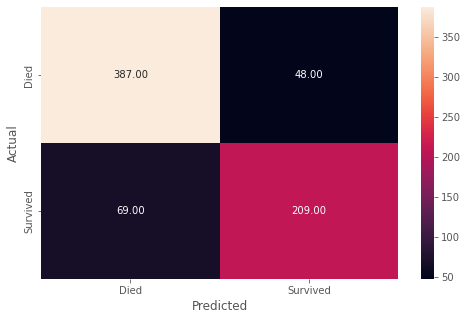

In [44]:
# Checking performance on the training data

y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_trainT)

metrics_score(Y_trainT, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       114
           1       0.79      0.70      0.74        64

    accuracy                           0.83       178
   macro avg       0.82      0.80      0.81       178
weighted avg       0.82      0.83      0.82       178



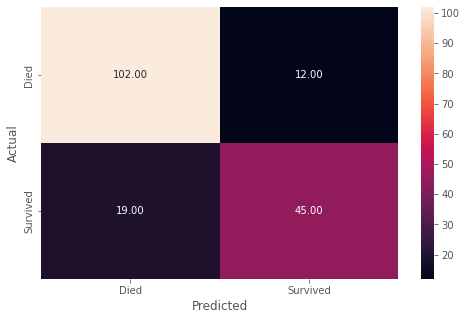

In [45]:
# Checking performance on the training data

y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_trainV)

metrics_score(Y_trainV, y_pred_test_rf_tuned)

In [46]:
# K-fold cross-validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_estimator_tuned, X_trainV, Y_trainV, cv=5)
print(f"The average score of the model with K-5 Cross validation is {np.average(scores)} ")

The average score of the model with K-5 Cross validation is 0.7749206349206349 


In [47]:
# Model Performance for Tuned RF model

rf_tuned_test = model_performance_classification(rf_estimator_tuned,X_trainV,Y_trainV)
rf_tuned_test

,Precision,Recall,Accuracy
0,0.816224,0.798931,0.825843


**Observation:**
 
- The Tuned Random Forest model is the best performing model so far with the best model scores on our training and test sets with **f1-score** of 0.74, **recall** of 0.70 and **accuracy** of 0.83.
- A recall of ~0.70 suggests that there is a 30% chance that the model will predict that a passenger will die even though they survived.
- The average recall and precision for the model are good but let's see if we can get even better performance using other algorithms.

- Also the model scores for the training and test sets have small differences. Model is generalizing well and not overfitting.

**Boosting Models**

In [48]:
# Importing the AdaBoostClassifier and GradientBoostingClassifier [Boosting]
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier

**Adaboost Classifier**

In [49]:
# Adaboost Classifier
adaboost_model = AdaBoostClassifier(random_state = 1)

# Fitting the model
adaboost_model.fit(X_trainT, Y_trainT)

AdaBoostClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       435
           1       0.79      0.71      0.75       278

    accuracy                           0.81       713
   macro avg       0.81      0.79      0.80       713
weighted avg       0.81      0.81      0.81       713



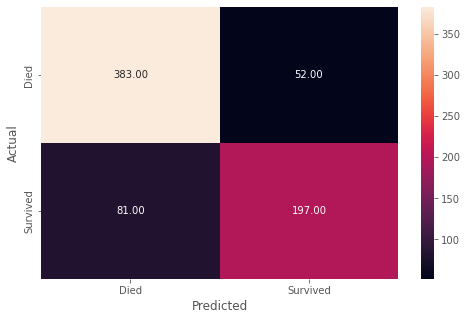

In [50]:
# Checking performance on the training data
y_pred_train_ad = adaboost_model.predict(X_trainT)

metrics_score(Y_trainT, y_pred_train_ad)

In [51]:
# Adaboost Model Performance on the validation data
adaboost_model_test = model_performance_classification(adaboost_model, X_trainV, Y_trainV)

adaboost_model_test

,Precision,Recall,Accuracy
0,0.800179,0.775493,0.808989


**Adaboost - Hyperparameter Tuning**

In [52]:
# Using GridSearch for Hyperparameter Tuning
# Choose the type of classifier
adaboost_tuned = AdaBoostClassifier(random_state = 1)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 250, 500],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(adaboost_tuned, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_trainT, Y_trainT)

# Set the classifier to the best combination of parameters
adaboost_tuned = gridCV.best_estimator_

# Fit the best estimator to the data
adaboost_tuned.fit(X_trainT, Y_trainT)

AdaBoostClassifier(n_estimators=100, random_state=1)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       435
           1       0.79      0.71      0.75       278

    accuracy                           0.81       713
   macro avg       0.81      0.79      0.80       713
weighted avg       0.81      0.81      0.81       713



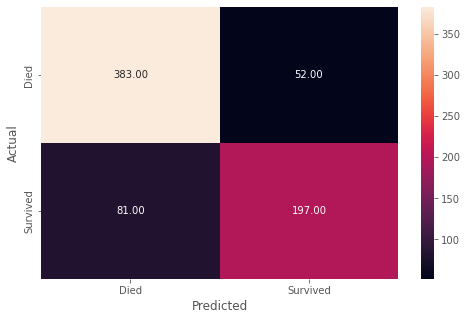

In [53]:
# Checking performance after tuning on the training data

y_pred_train_ad_tuned = adaboost_tuned.predict(X_trainT)
metrics_score(Y_trainT, y_pred_train_ad_tuned)

In [54]:
# Adaboost_tuned Model Performance on the validation data

adaboost_tuned_test = model_performance_classification(adaboost_tuned, X_trainV, Y_trainV)
adaboost_tuned_test

,Precision,Recall,Accuracy
0,0.800179,0.775493,0.808989


**Observation:**

- Adaboost Classifier model score lower than previous models, not performing as good previous models.

**Gradient Boost Classifier**

In [55]:
# Gradient Boost Classifier
gbc = GradientBoostingClassifier(random_state = 1)

# Fitting the model
gbc.fit(X_trainT, Y_trainT)

# Model Performance on the validation data
gbc_perf_test = model_performance_classification(gbc, X_trainV, Y_trainV)

gbc_perf_test

,Precision,Recall,Accuracy
0,0.81141,0.776453,0.814607


**Gradient Boost Classifier - Hyperparameter Tuning**

In [56]:
# Using GridSearch for Hyperparameter Tuning
# Choose the type of classifier
gbc_tuned = GradientBoostingClassifier(random_state = 1)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 250, 500],
              'max_depth': np.arange(2, 7),              
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(gbc_tuned, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_trainT, Y_trainT)

# Set the classifier to the best combination of parameters
gbc_tuned = gridCV.best_estimator_

# Fit the best estimator to the data
gbc_tuned.fit(X_trainT, Y_trainT)

GradientBoostingClassifier(max_depth=2, n_estimators=250, random_state=1)

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       435
           1       0.87      0.71      0.78       278

    accuracy                           0.84       713
   macro avg       0.85      0.82      0.83       713
weighted avg       0.85      0.84      0.84       713



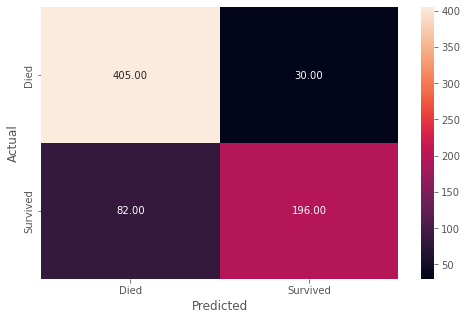

In [57]:
# Checking performance after tunung on the training data

y_pred_train_gbc_tuned = gbc_tuned.predict(X_trainT)
metrics_score(Y_trainT, y_pred_train_gbc_tuned)

In [58]:
# Gbc tuned Model Performance on the validation data
gbc_tuned_test = model_performance_classification(gbc_tuned, X_trainV, Y_trainV)

gbc_tuned_test

,Precision,Recall,Accuracy
0,0.813471,0.787692,0.820225


**Observation:**

- Gradient boost Classifier model score slightly lower than previous models, not performing as Tuned Random Forest.

**Extreme Gradient Boosting Classifier**

In [59]:
# XGBoost Classifier
xgb = XGBClassifier(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb.fit(X_trainT,Y_trainT)

# Model Performance on the validation data
xgb_perf_test = model_performance_classification(xgb,X_trainV,Y_trainV)

xgb_perf_test

,Precision,Recall,Accuracy
0,0.775794,0.74767,0.786517


In [60]:
# Using GridSearch for Hyperparameter Tuning
# Choose the type of classifier
xgb_tuned = XGBClassifier(random_state = 1)

# Grid of parameters to choose from
parameters = {'learning_rate': [0.01, 0.1],
                'max_depth': [2, 3, 4, 5],
                'min_child_weight': [1, 3, 5],
                'subsample': [0.5, 0.7],
                'colsample_bytree': [0.5, 0.7],
                'n_estimators' : [100, 200],
                "eval_metric": ["logloss", "error"],              
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(xgb_tuned, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_trainT, Y_trainT)

# Set the classifier to the best combination of parameters
xgb_tuned = gridCV.best_estimator_

# Fit the best estimator to the data
xgb_tuned.fit(X_trainT, Y_trainT)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1, ...)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       435
           1       0.82      0.74      0.78       278

    accuracy                           0.84       713
   macro avg       0.83      0.82      0.83       713
weighted avg       0.84      0.84      0.84       713



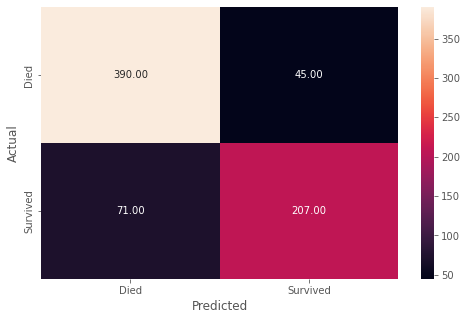

In [61]:
# Checking performance after tuning on the training data

y_pred_train_xgb_tuned = xgb_tuned.predict(X_trainT)
metrics_score(Y_trainT, y_pred_train_xgb_tuned)

In [62]:
# Checking Model Performance after tuning on the validation data

xgb_tuned_test = model_performance_classification(xgb_tuned,X_trainV,Y_trainV)
xgb_tuned_test

,Precision,Recall,Accuracy
0,0.808764,0.794545,0.820225


**Observation:**

- XGboost Classifier model score slightly lower than previous models, not performing as well as the Tuned Random Forest.

**Support Vector Machine**

In [63]:
from sklearn import svm #Support Vector Machine
from sklearn.svm import SVC #Support Vector Classifier

In [64]:
# SVM Classifier
svm_clf = SVC()

# Fitting the model
svm_clf.fit(X_trainT,Y_trainT)

SVC()

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       114
           1       0.78      0.66      0.71        64

    accuracy                           0.81       178
   macro avg       0.80      0.78      0.78       178
weighted avg       0.81      0.81      0.80       178



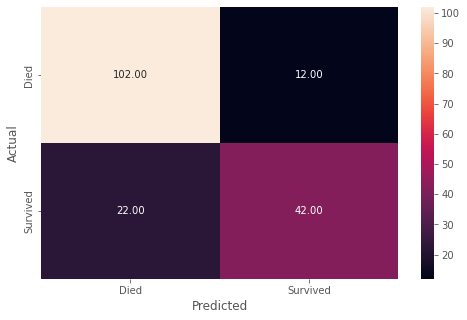

In [65]:
# Checking performance on the validation data

y_pred_test_svm = svm_clf.predict(X_trainV)
metrics_score(Y_trainV, y_pred_test_svm)

**Observations:**

- **SVM model score slightly lower than previous models, not performing as Tuned Random Forest.**
- SVM model under-performing with **f1-score** of 0.71, **recall** of 0.66 and **accuracy** of 0.81.
- The SVM model is not performing well in terms of accuracy of 81%. The recall for class 1 of 66% is quite low compared to class 0 of 89%, which implies that this model has a high number of false negative, the model will not perform so well in predicting passengers that will survive.
- A recall of ~0.66 suggests that there is a 34% chance that the model will predict that a passenger will die even though they survived.
- The average recall and precision for the model are not good enough 

In [66]:
# Model Performance on the validation data

svm_model_test = model_performance_classification(svm_clf,X_trainV,Y_trainV)
svm_model_test

,Precision,Recall,Accuracy
0,0.800179,0.775493,0.808989


**Comparison of all the models we have built so far**

In [68]:
models_test_comp_df = pd.concat(
    
    [    
    dtree_test.T, dtree_tuned_test.T,rf_estimator_test.T,
    rf_tuned_test.T, adaboost_tuned_test.T, gbc_tuned_test.T,
    xgb_tuned_test.T, svm_model_test.T
    ],
    
    axis = 1,
)

models_test_comp_df.columns = [
    "Decision Tree classifier",
    "Tuned Decision Tree classifier",
    "Random Forest classifier",
    "Tuned Random Forest classifier",
    "Tuned Adaboost classifier",
    "Tuned Gradientboost classifier",
    "Tuned XGBoost classifier",
    "SVM classifier"
]

models_test_comp_df

,Decision Tree classifier,Tuned Decision Tree classifier,Random Forest classifier,Tuned Random Forest classifier,Tuned Adaboost classifier,Tuned Gradientboost classifier,Tuned XGBoost classifier,SVM classifier
Precision,0.767308,0.781007,0.781358,0.816224,0.800179,0.813471,0.808764,0.800179
Recall,0.728618,0.777001,0.755482,0.798931,0.775493,0.787692,0.794545,0.775493
Accuracy,0.775281,0.797753,0.792135,0.825843,0.808989,0.820225,0.820225,0.808989


**Observation:**

- From the table above our best performing model is the tuned random forest

**Predicting target variable for test data with our best performing model Tuned Random Forest**

In [69]:
#Printing target variable for test data as array 

test_predictions = rf_estimator_tuned.predict(test_features)
test_predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [70]:
# Making a new dataframe to get the display prediction results

test_result = pd.DataFrame()

test_result['PassengerId'] = test['PassengerId']

test_result['Survived'] = test_predictions

test_result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


**Conclusion:**
- Tuned Random Forest gives us the best performance in predicting the perssengers that survived for this dataset. 
- Tuning the random forest model to obtain optimal values for the hyperparameters gave a generalized result and the best performance,
- In boosting algorithms, the tuned XGBoost has given good score among other algorithms.
